### Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston["feature_names"])
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [3]:
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [4]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [5]:
X_train_tsne = tsne.fit_transform(scaled_X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


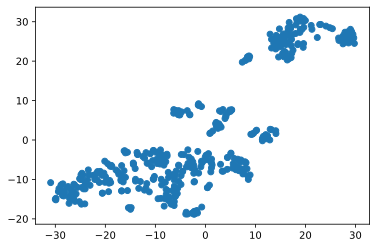

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Task 2

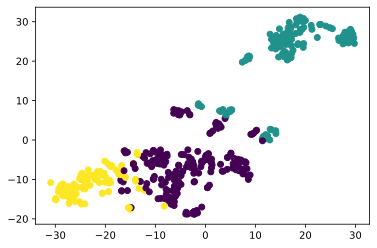

In [7]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = model.fit_predict(scaled_X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [8]:
df = X_train
df['cluster'] = labels_train
pd.DataFrame(df.groupby('cluster').mean()['CRIM'])

,CRIM
cluster,
0,0.420986
1,10.715219
2,0.072118


In [9]:
df = pd.DataFrame(y_train, columns=['price'])
df['cluster'] = labels_train
df.groupby('cluster').mean()

,price
cluster,
0,24.971204
1,16.179688
2,27.874118


### Task 3

In [10]:
labels_test = model.fit_predict(scaled_X_test)

In [11]:
df = X_test
df['cluster'] = labels_test
pd.DataFrame(df.groupby('cluster').mean()['CRIM'])

,CRIM
cluster,
0,0.083085
1,9.419182
2,0.222501


In [12]:
df = pd.DataFrame(y_test, columns=['price'])
df['cluster'] = labels_test
df.groupby('cluster').mean()

,price
cluster,
0,34.553846
1,16.710526
2,21.717647
